In [6]:
import networkx as nx
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
adata = sc.read("/mnt/c/Users/sneha/BrainCellAtlas/data/human_mtg_brain_atlas_final.h5ad")

In [13]:
gene_list = pd.read_csv('/mnt/c/Users/sneha/OneDrive/Desktop/gene expression matrices human/genes-rows.csv')
target_genes = gene_list['gene'].tolist() #extract one column as list i.e gene symbol from df
gene_present = [g for g in target_genes if g in adata.raw.var_names] #check which genes are present in the dataframe index


In [14]:
gene_expr = adata.raw[:,gene_present].X.toarray()
corr_matrix, pvals = spearmanr(gene_expr, axis=0)
# calculate correlation matrix
corr_matrix, pvals = spearmanr(gene_expr, axis=0)
# build network
G = nx.Graph()
for i, gene1 in enumerate(gene_present):
    for j, gene2 in enumerate(gene_present):
        if i < j and pvals[i, j] < 0.01 and abs(corr_matrix[i, j]) > 0.3: # threshold
            G.add_edge(gene1, gene2, weight=corr_matrix[i, j])

Found 24 gene modules


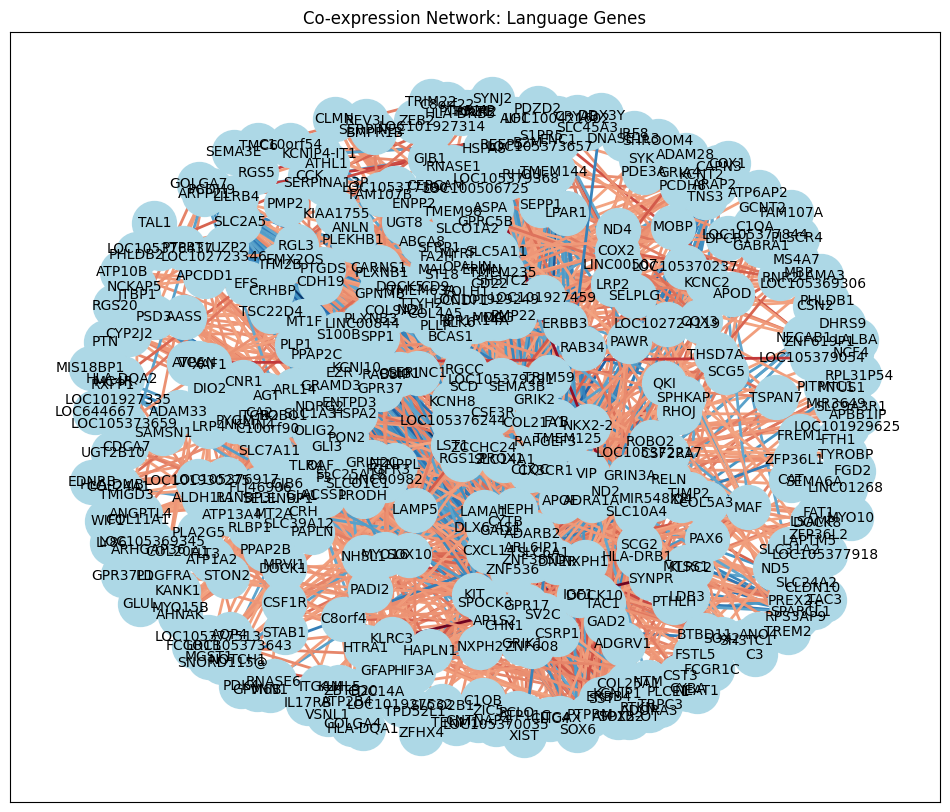

In [17]:
pos = nx.spring_layout(G, k=0.5)
edge_weights = [G[u][v]['weight'] for u,v in G.edges()]
plt.figure(figsize=(12, 10))
nx.draw_networkx(G, pos,
                  node_color='lightblue', node_size=1000, edge_color=edge_weights, edge_cmap=plt.cm.RdBu_r, width=2, with_labels=True, font_size=10)

plt.title('Co-expression Network: Language Genes')
#plt.savefig('results/networks/coexpression_network.pdf', dpi=300, bbox_inches='tight')
communities = nx.community.greedy_modularity_communities(G)
print(f"Found {len(communities)} gene modules")